Competition Domain: HR analytics

Batch 1 - Team 2

Question: 

The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

Need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Input data into python 

In [2]:
emp_pro=pd.read_csv(r"D:\DSA - ICT\Competition\Employee_promotion.csv")

Display 5 rows of data

In [3]:
emp_pro.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


Dimension of the dataset

In [4]:
emp_pro.shape

(54808, 13)

In [5]:
#The above dataset satisfies the condition given regarding data set dimensions

# Basic Checks in dataset

Basic information of the data

In [6]:
emp_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
#There are some null entries in the dataset

Datatypes of the columns

In [8]:
emp_pro.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [9]:
emp_pro.dtypes.value_counts()

int64      6
object     5
float64    2
dtype: int64

In [10]:
#Here we can see that there are 8 numerical variables and 5 categorical variables in the dataset

Basic summary of the dataset for numerical variables

In [11]:
emp_pro.describe().style.background_gradient(cmap="YlOrRd")

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Basic summary of the dataset for categorical variables

In [12]:
emp_pro.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Check for duplicate values in dataset

In [13]:
duplicate=emp_pro[emp_pro.duplicated()]
duplicate.shape

(0, 13)

In [14]:
#There are no duplicate rows in the dataset

# Exploratory Data Analysis

Univariate analysis and Bivariate analysis
We will do the univariate analysis of each column feature and also the bivariate analysis of each column feature with the target

Basic summary of the dataset

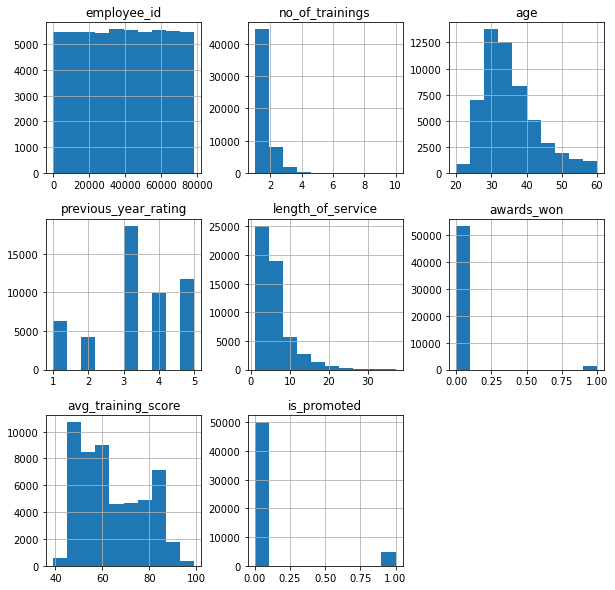

In [15]:
emp_pro.hist(figsize=(10,10))
plt.show()

In [16]:
#The above is a basic summary of the data set
#Now we will do the visual analysis of each of the features

we will now plot for all the column features using a for loop 

Distribution of  department


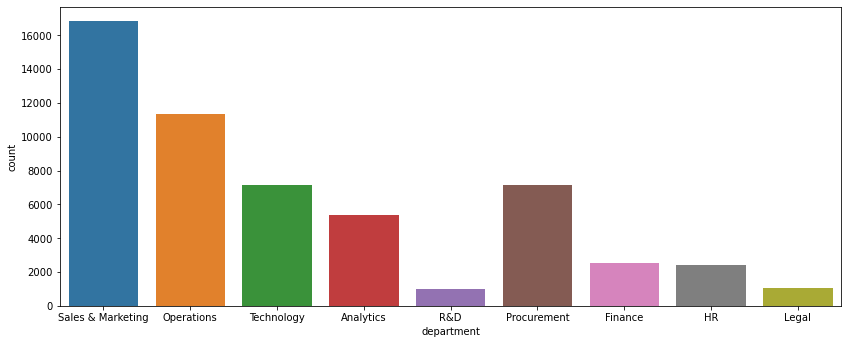

Distribution of  education


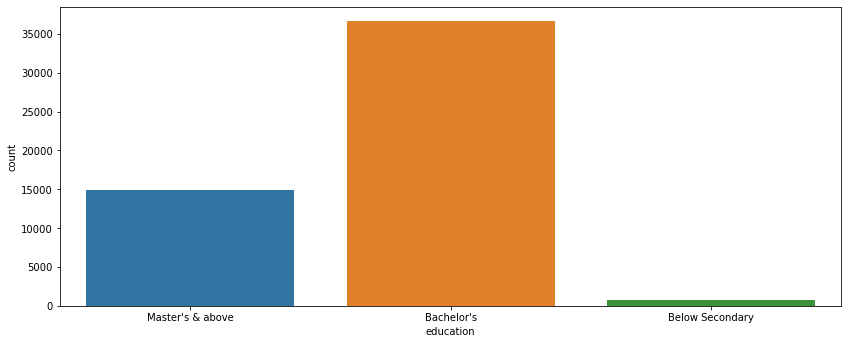

Distribution of  gender


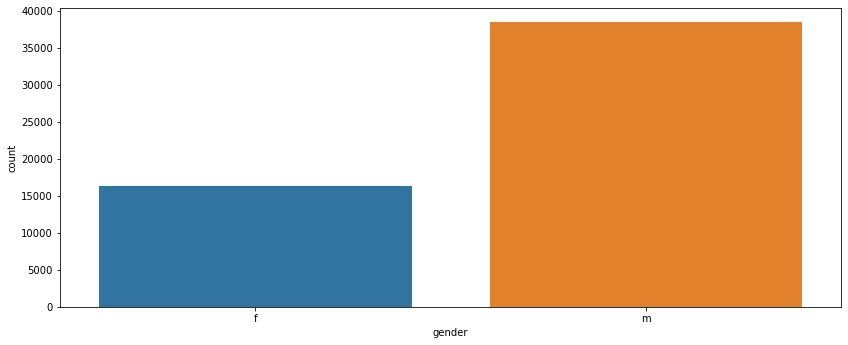

Distribution of  recruitment_channel


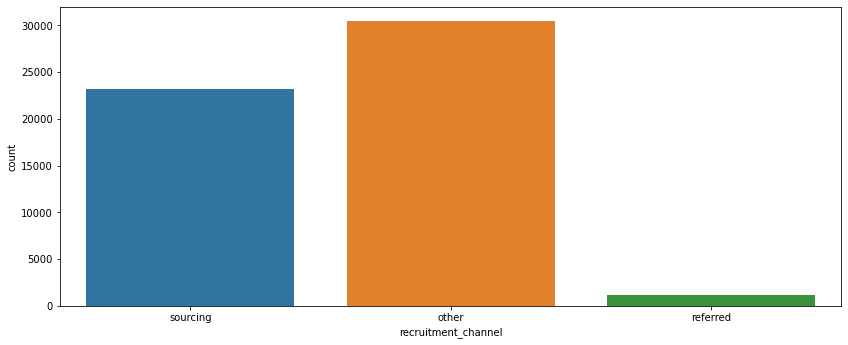

Distribution of  no_of_trainings


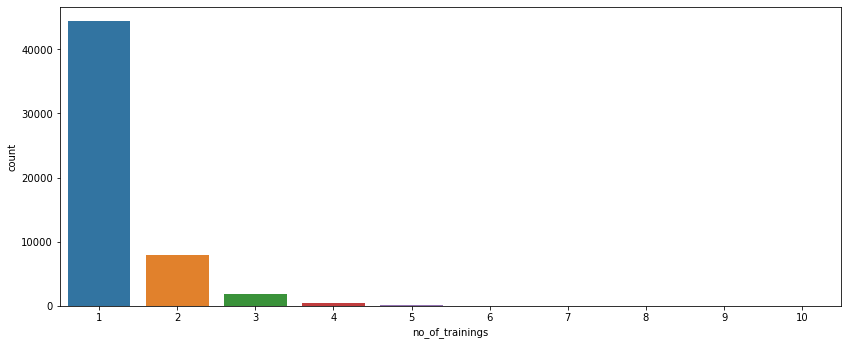

Distribution of  age


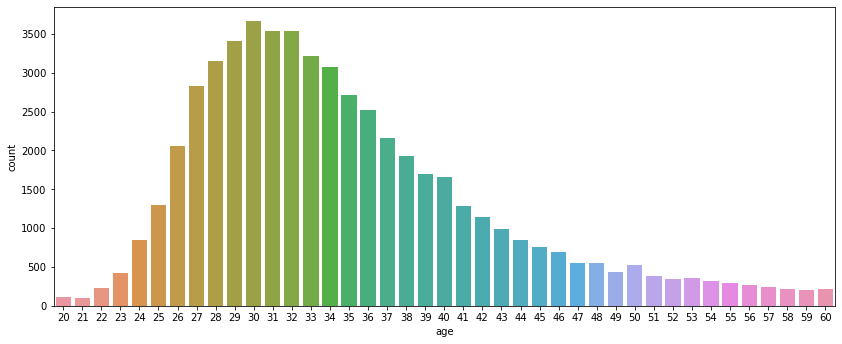

Distribution of  previous_year_rating


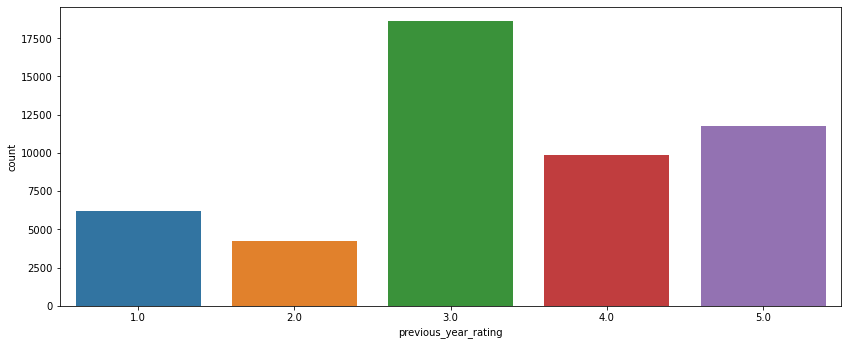

Distribution of  length_of_service


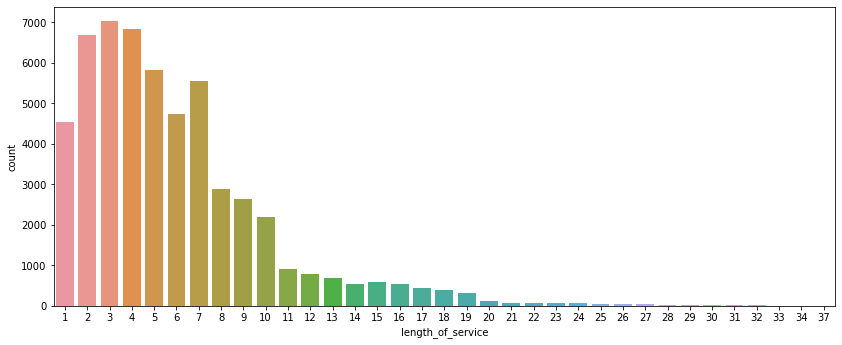

Distribution of  awards_won


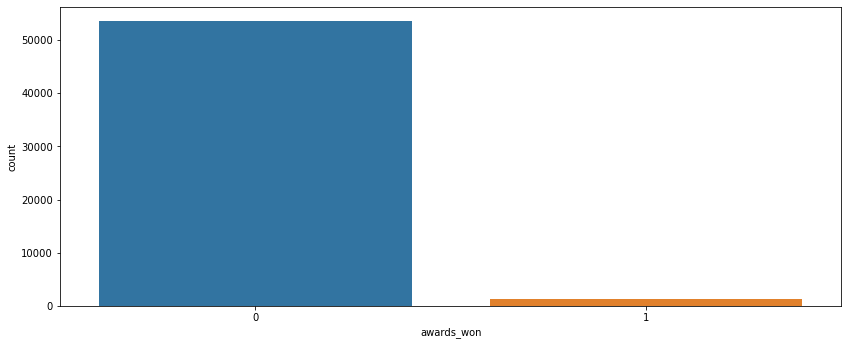

Distribution of  avg_training_score


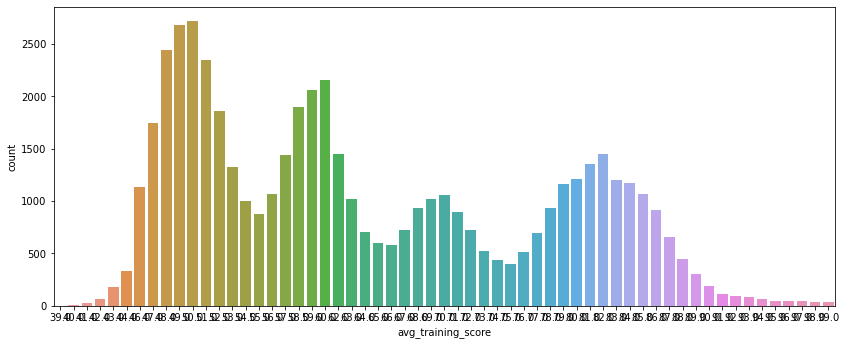

In [17]:
columns = ["department", "education", "gender", "recruitment_channel", "no_of_trainings", "age",
          "previous_year_rating", "length_of_service", "awards_won", "avg_training_score"]

for i in columns:
    plt.figure(figsize=(14, 5.5))
    sns.countplot(x=emp_pro[i])
    print("Distribution of ",i )
    plt.show()

We will plot the features with respect to promotion since it is our target

Distribution of  department with respect to promotion


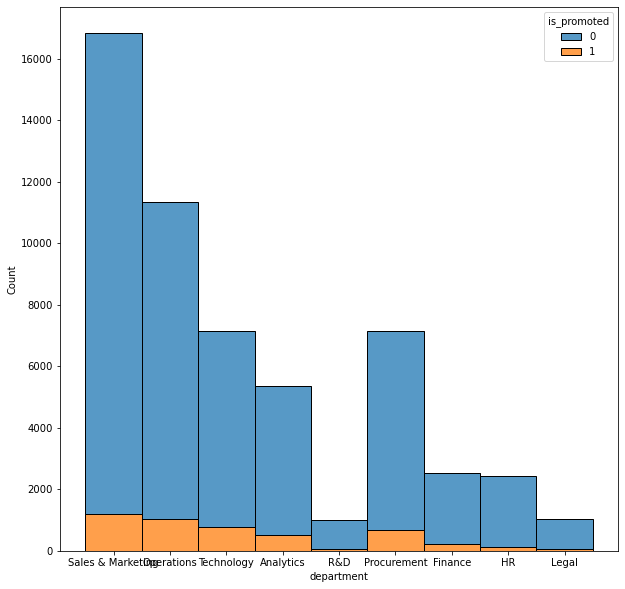

Distribution of  education with respect to promotion


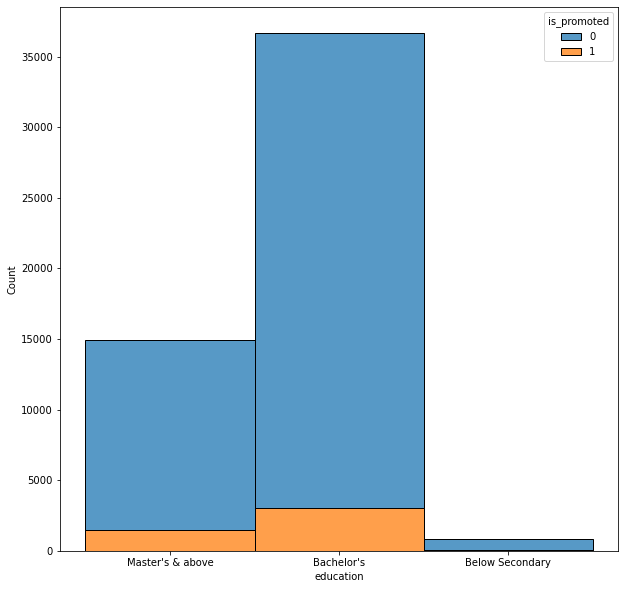

Distribution of  gender with respect to promotion


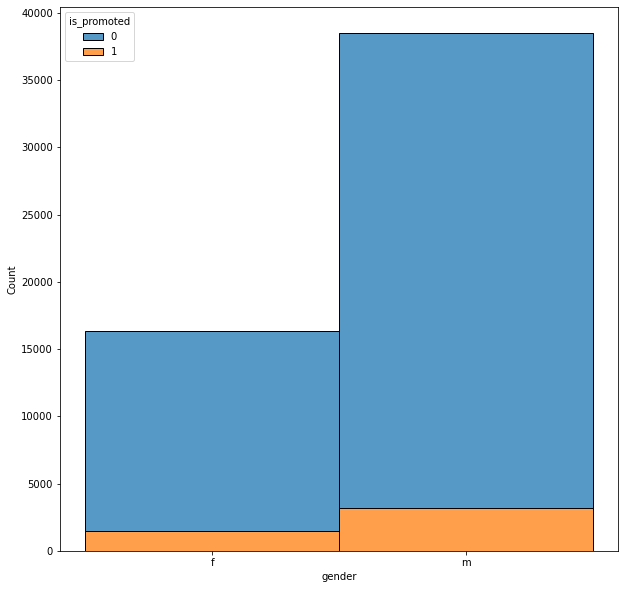

Distribution of  recruitment_channel with respect to promotion


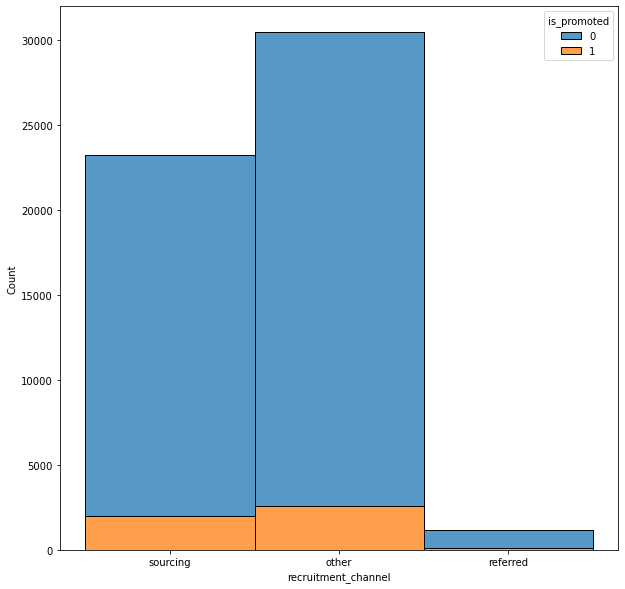

Distribution of  no_of_trainings with respect to promotion


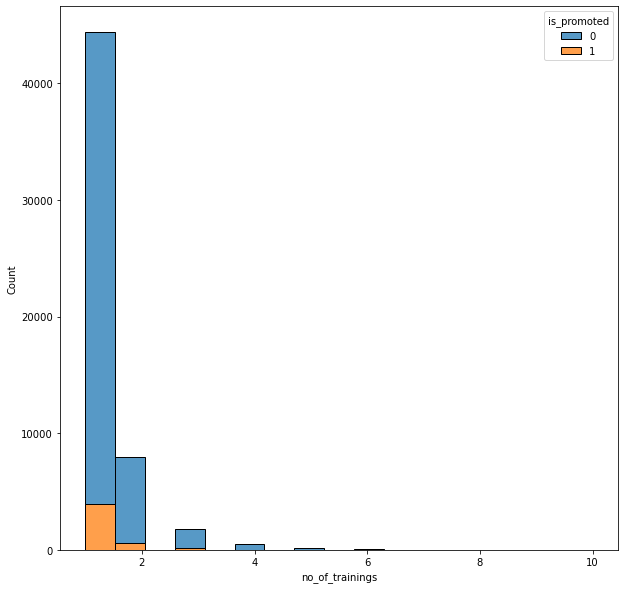

Distribution of  age with respect to promotion


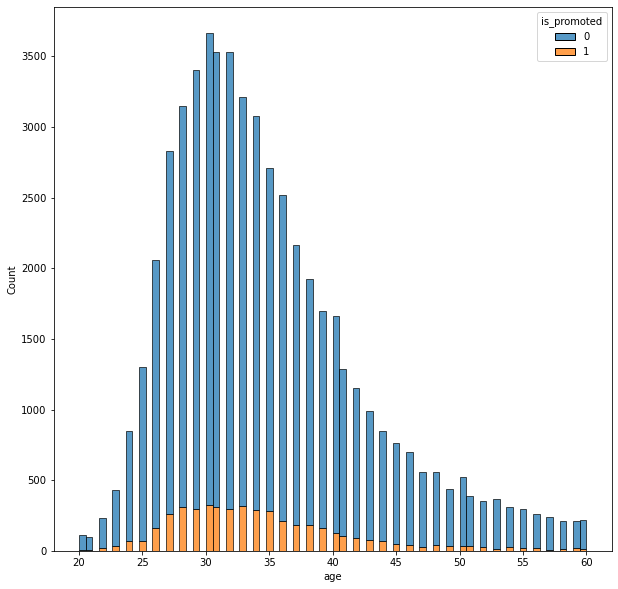

Distribution of  previous_year_rating with respect to promotion


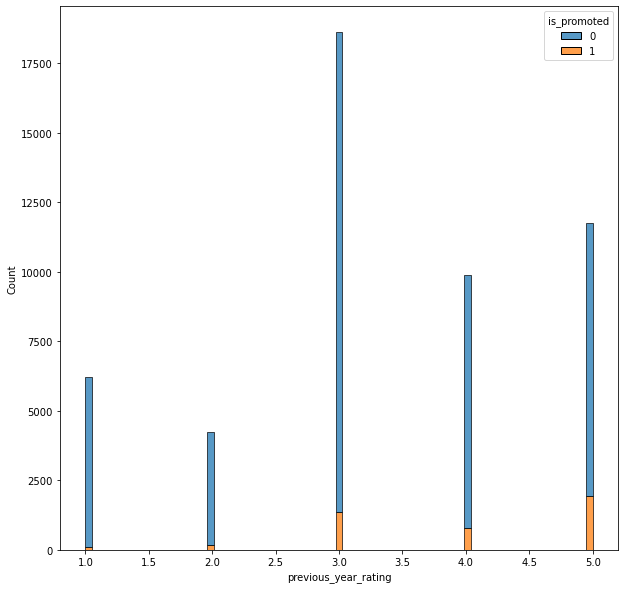

Distribution of  length_of_service with respect to promotion


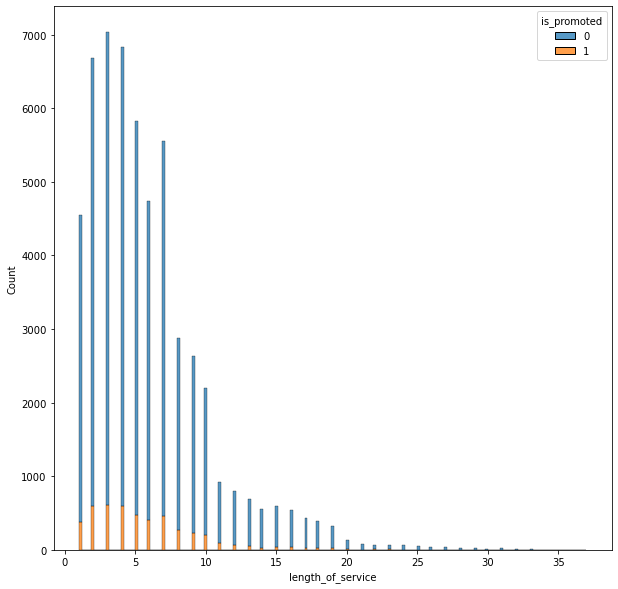

Distribution of  awards_won with respect to promotion


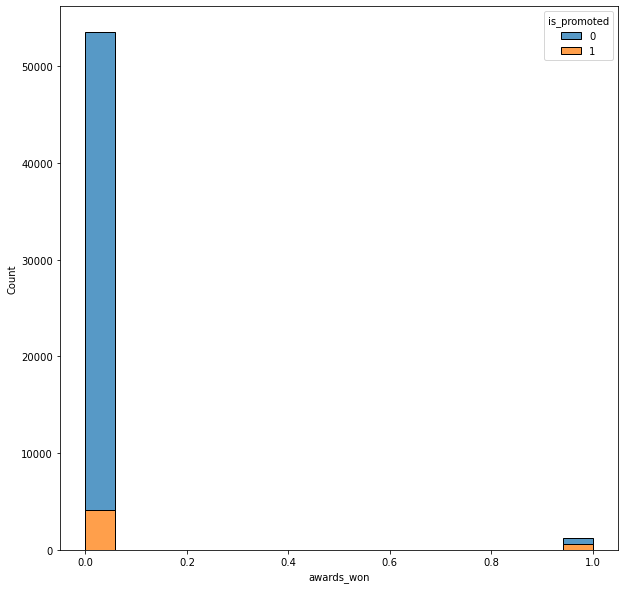

Distribution of  avg_training_score with respect to promotion


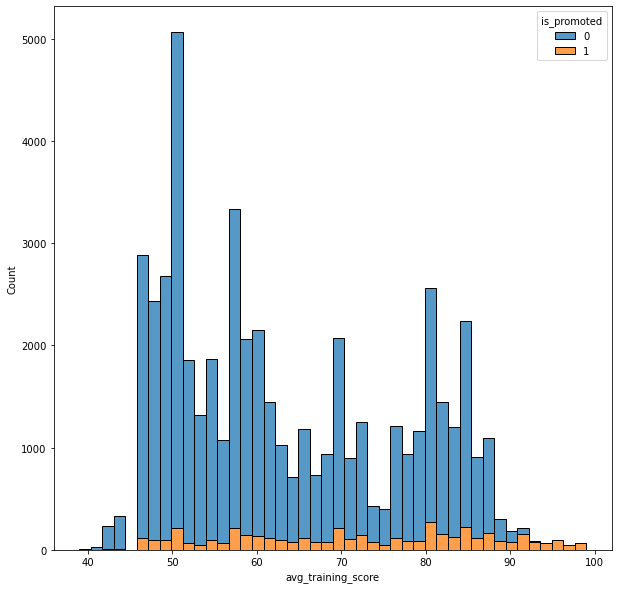

In [18]:
for i in columns:
    plt.figure(figsize=(10, 10))
    sns.histplot(x=emp_pro[i], hue=emp_pro["is_promoted"], multiple="stack")
    print("Distribution of ",i ,"with respect to promotion")
    plt.show()

Now we will do detailed visualidation and analyse each feature and get some intepretation

Department wise distribution

In [19]:
count=emp_pro["department"].value_counts()
count.to_frame()

,department
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


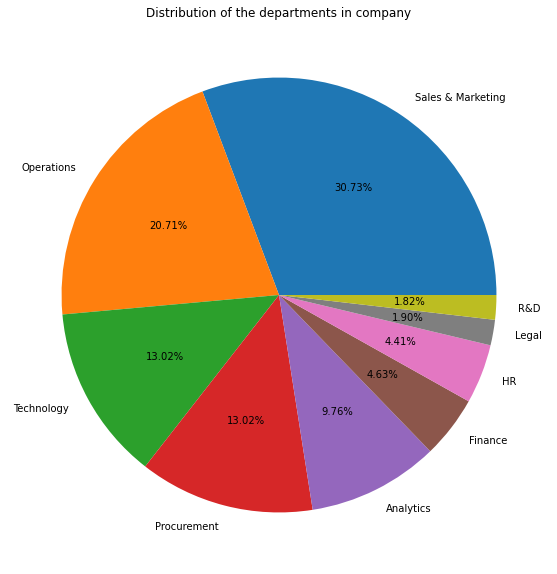

In [20]:
plt.figure(figsize=(10,10))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Distribution of the departments in company")
plt.show()

In [21]:
#We can see that Sales and marketing and Operations are comprising almost 50% of the department
# Next comes Technology and Procurement which are having equal distribution

Distribution of promotion received department wise

Text(0.5, 1.0, 'Department wise promotion status')

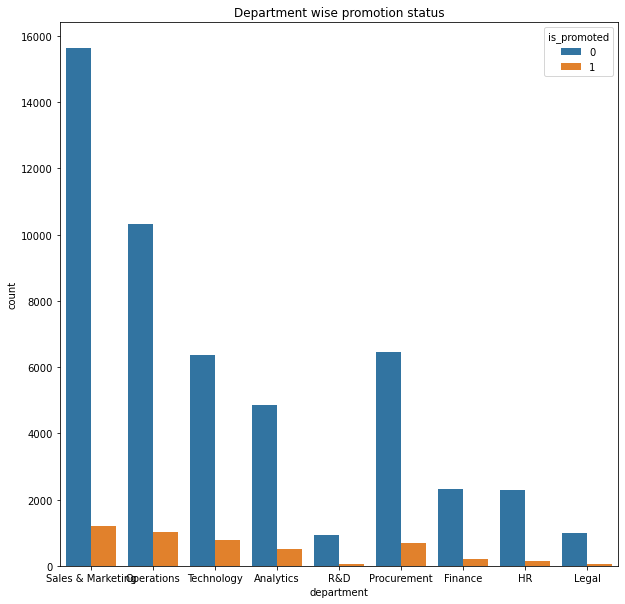

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x="department",data=emp_pro,hue="is_promoted")
plt.title("Department wise promotion status")

In [23]:
emp_pro.groupby(['department','is_promoted'])['is_promoted'].count().to_frame()

is_promoted
department        is_promoted             
Analytics         0                   4840
                  1                    512
Finance           0                   2330
                  1                    206
HR                0                   2282
                  1                    136
Legal             0                    986
                  1                     53
Operations        0                  10325
                  1                   1023
Procurement       0                   6450
                  1                    688
R&D               0                    930
                  1                     69
Sales & Marketing 0                  15627
                  1                   1213
Technology        0                   6370
                  1                    768

In [24]:
promoted=emp_pro[emp_pro.is_promoted==1]
Dept_pro=promoted.department.value_counts()/emp_pro.department.value_counts()*100
Dept_pro.to_frame().sort_values(by=["department"],ascending=False)

,department
Technology,10.759316
Procurement,9.638554
Analytics,9.566517
Operations,9.014804
Finance,8.123028
Sales & Marketing,7.203088
R&D,6.906907
HR,5.624483
Legal,5.101059


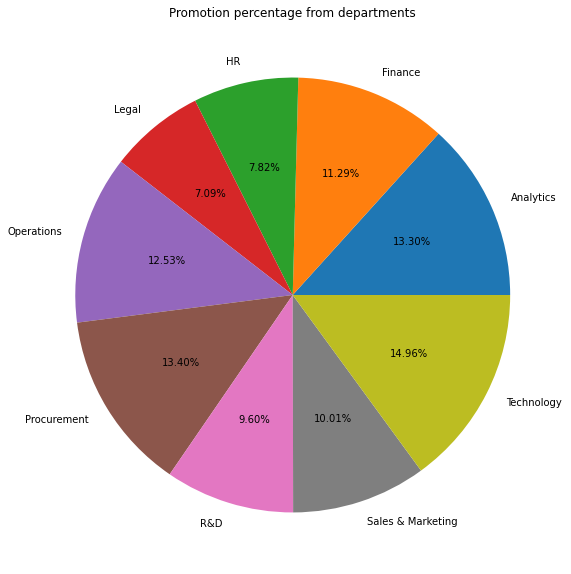

In [25]:
plt.figure(figsize=(10,10))
plt.pie(Dept_pro,labels=Dept_pro.index,autopct='%1.2f%%')
plt.title("Promotion percentage from departments")
plt.show()

In [26]:
#From the above we can see that technology department have more promotions followed by procurement and analytics
#The least promotion is for the legal

Region wise distribution

In [27]:
count_1=emp_pro["region"].value_counts()
count_1.to_frame()

,region
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659
region_16,1465


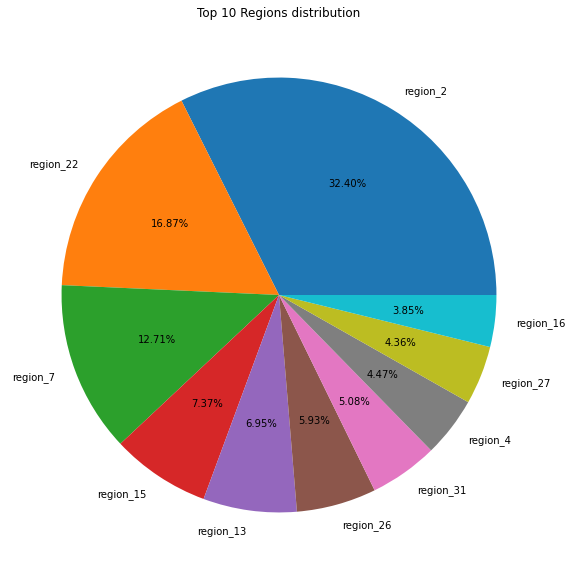

In [28]:
plt.figure(figsize=(10,10))
plt.pie(count_1[:10],labels=count_1.index[:10],autopct='%1.2f%%')
plt.title("Top 10 Regions distribution")
plt.show()

In [29]:
#Region 2 tops the region wise distribution followed by 22 and 7

In [30]:
promoted1=emp_pro[emp_pro.is_promoted==1]
Reg_pro=promoted1.region.value_counts()/emp_pro.region.value_counts()*100
Reg_pro.to_frame().sort_values(by=["region"],ascending=False)

,region
region_4,14.445097
region_17,13.693467
region_25,12.576313
region_28,11.684370
region_23,11.659574
region_22,11.418793
region_3,10.693642
region_7,10.654553
region_1,9.508197
region_30,8.980213


In [31]:
#From the above we can see that region 4 tops in the promotion percentage 

Education and Gender Visualisation

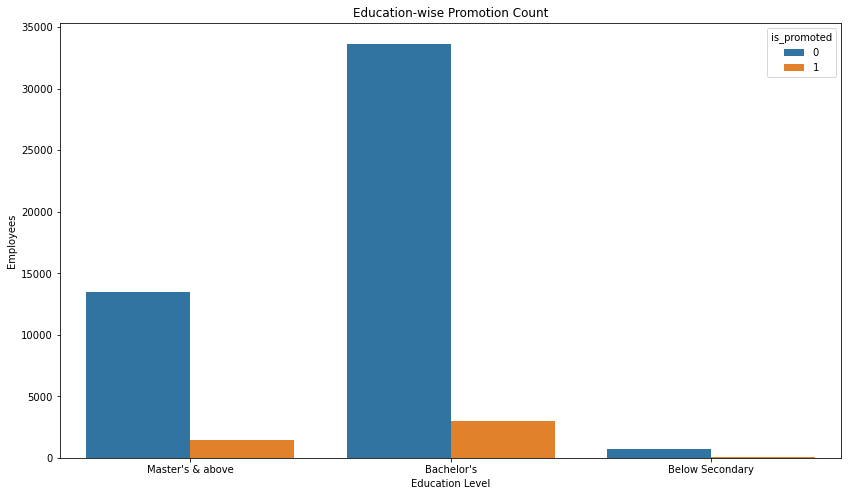

In [32]:
plt.figure(figsize=(14,8))
sns.countplot(x='education',hue='is_promoted',data=emp_pro)
plt.title('Education-wise Promotion Count')
plt.xlabel('Education Level')
plt.ylabel('Employees')
plt.show()

In [33]:
emp_pro.groupby(['education','is_promoted'])['is_promoted'].count().to_frame()

is_promoted
education        is_promoted             
Bachelor's       0                  33661
                 1                   3008
Below Secondary  0                    738
                 1                     67
Master's & above 0                  13454
                 1                   1471

In [34]:
#Here we can see that the promotion number is very small when compared with the not promoted in all education qualifications

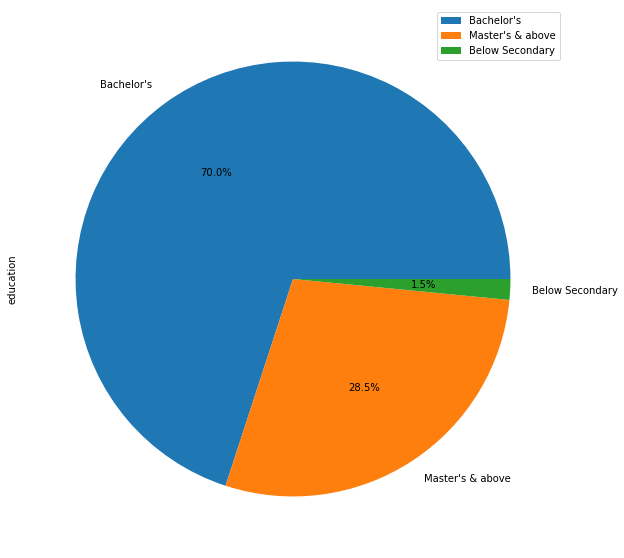

In [35]:
emp_pro["education"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

In [36]:
#Here we can see that majority of the employees hold a graduate degree and more 
#Very few people have been hired with below secondary education

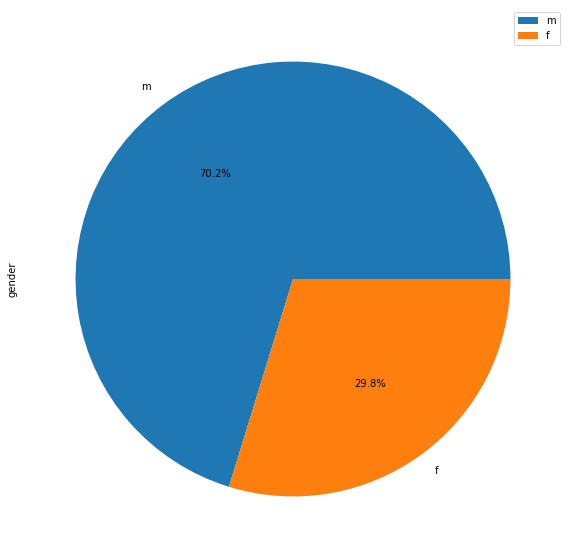

In [37]:
emp_pro["gender"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

In [38]:
#Similarly males are more with 70.2% compared to females with 29.8%

In [39]:
promoted2=emp_pro[emp_pro.is_promoted==1]
Gen_pro=promoted2.gender.value_counts()/emp_pro.gender.value_counts()*100
Gen_pro.to_frame().sort_values(by=["gender"],ascending=False)

,gender
f,8.993379
m,8.315150


In [40]:
#Here we can see that even though male employees are more , there is no disparity in promotions and it is almost equal

Recruitment Channel

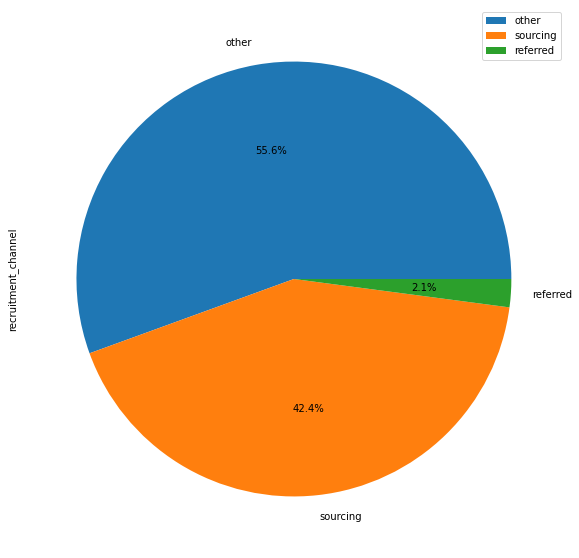

In [41]:
emp_pro["recruitment_channel"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

In [42]:
#From the data, referral is the least preferred by the company with sourcing coming in the second place, others top the list

In [43]:
promoted3=emp_pro[emp_pro.is_promoted==1]
Rec_pro=promoted3.recruitment_channel.value_counts()/emp_pro.recruitment_channel.value_counts()*100
Rec_pro.to_frame().sort_values(by=["recruitment_channel"],ascending=False)

,recruitment_channel
referred,12.084063
sourcing,8.501292
other,8.395191


In [44]:
#Even though the referral is very less , people hired through referral have got more promotions

no_of_trainings

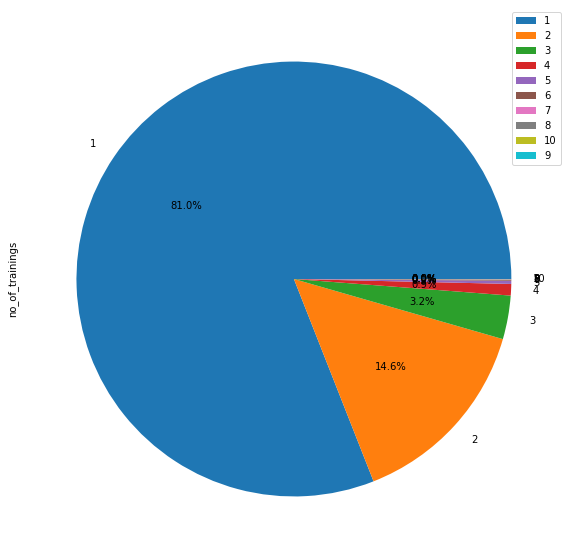

In [45]:
emp_pro["no_of_trainings"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

In [46]:
#Most of the employees have attended minimum one training- 81% have attended 1 trainings

In [47]:
promoted4=emp_pro[emp_pro.is_promoted==1]
Tra_pro=promoted4.no_of_trainings.value_counts()/emp_pro.no_of_trainings.value_counts()*100
Tra_pro.to_frame().sort_values(by=["no_of_trainings"],ascending=False)

,no_of_trainings
1,8.810672
2,7.574809
3,6.869369
4,5.555556
6,4.545455
5,2.343750
7,NaN
8,NaN
9,NaN
10,NaN


In [48]:
#Here we can see that more trainings is not adding any advantage to promotion as it is having a negative relation"

Age

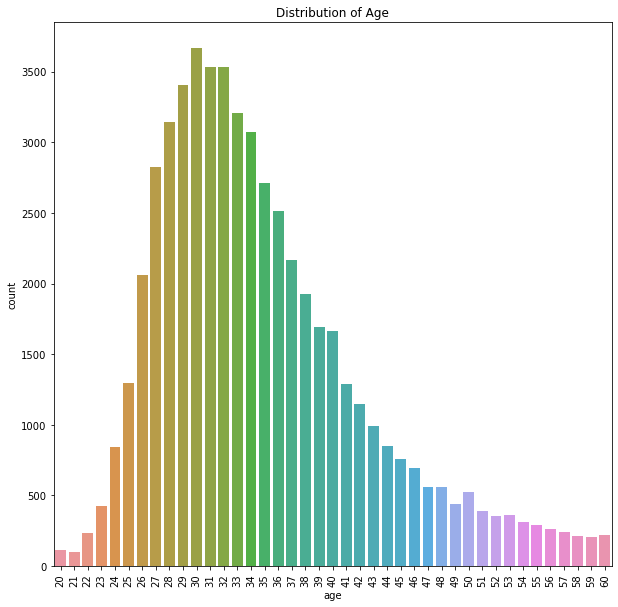

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(x="age",data=emp_pro)
plt.title("Distribution of Age")
plt.xticks(rotation=90)
plt.show()

In [50]:
#Here we can see that ages 26 to 36 constitute the major population as each of these ages have 2000 plus employees
# The data is very slightly skewed 

In [51]:
promoted5=emp_pro[emp_pro.is_promoted==1]
Age_pro=promoted.age.value_counts()/emp_pro.age.value_counts()*100
Age_pro.to_frame().sort_values(by=["age"],ascending=False)

,age
35,10.438952
33,9.937695
28,9.787099
38,9.568383
39,9.498525
34,9.297789
27,9.232402
30,8.840382
31,8.771930
51,8.740360


In [52]:
#From the above , there is no inference to be drawn as it is wide spread across all ages

previous_year_rating

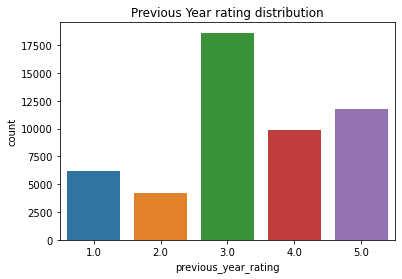

In [53]:
sns.countplot(x = "previous_year_rating",data= emp_pro)
plt.title("Previous Year rating distribution")
plt.show()

In [54]:
#From the above we can see that company follows a bell curve distribution which most of the companies 
# follow for preformance review

In [55]:
promoted6=emp_pro[emp_pro.is_promoted==1]
Rating_pro=promoted.previous_year_rating.value_counts()/emp_pro.previous_year_rating.value_counts()*100
Rating_pro.to_frame().sort_values(by=["previous_year_rating"],ascending=False)

,previous_year_rating
5.0,16.361468
4.0,7.937633
3.0,7.277903
2.0,4.284024
1.0,1.414109


In [56]:
#it is clear that more the ratings , higher is promotion , direct relationship

length_of_service

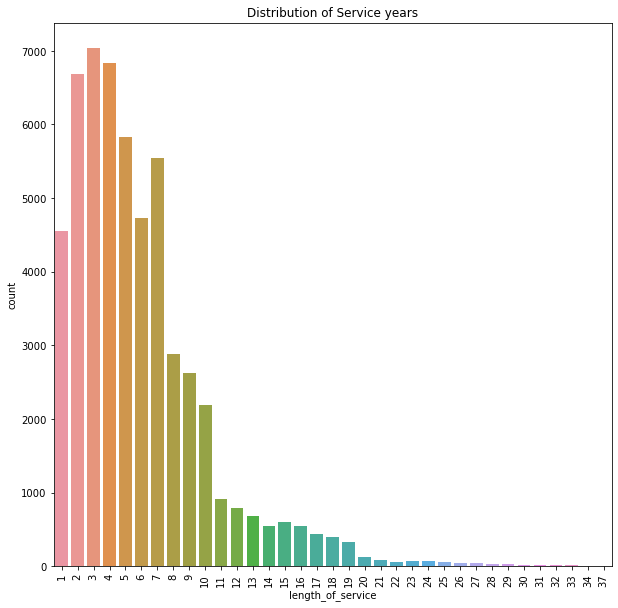

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(x="length_of_service",data=emp_pro)
plt.title("Distribution of Service years")
plt.xticks(rotation=90)
plt.show()

In [58]:
# More people are concentrated in the 1-10 years of expereince , after 10 years , number reduces drastically less than 1000
# The data looks like right skewed and there are chances of outliers 

In [59]:
promoted7=emp_pro[emp_pro.is_promoted==1]
Exp_pro=promoted.length_of_service.value_counts()/emp_pro.length_of_service.value_counts()*100
Exp_pro.to_frame().sort_values(by=["length_of_service"],ascending=False)

,length_of_service
34,25.000000
32,20.000000
23,10.769231
11,10.480349
29,10.000000
22,9.836066
19,9.726444
8,9.330558
10,9.302326
2,8.901855


In [60]:
#From the above , there is no inference to be drawn 

awards_won

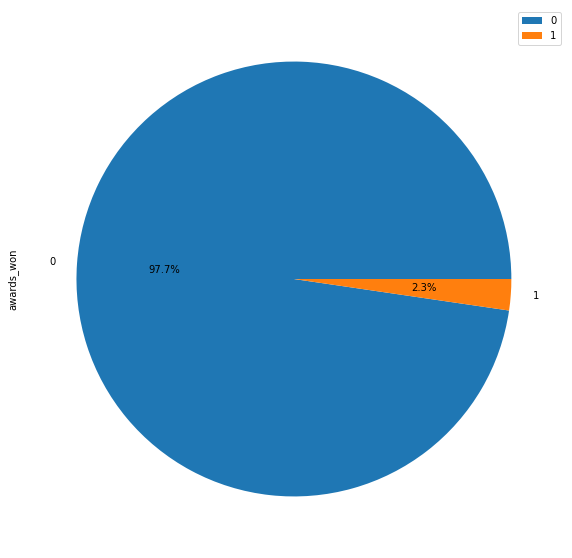

In [61]:
emp_pro["awards_won"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

In [62]:
#There is a small percentage of employees that are receiving the awards

In [63]:
promoted8=emp_pro[emp_pro.is_promoted==1]
Awd_pro=promoted.awards_won.value_counts()/emp_pro.awards_won.value_counts()*100
Awd_pro.to_frame().sort_values(by=["awards_won"],ascending=False)

,awards_won
1,44.015748
0,7.674922


In [64]:
#So awards won and promotion have direct relationship , there is a high change of getting promotion if award is received

Average training score

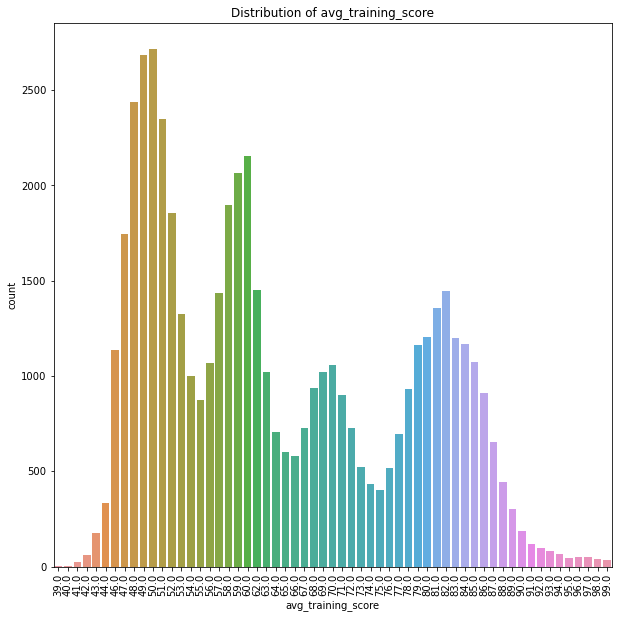

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(x="avg_training_score",data=emp_pro)
plt.title("Distribution of avg_training_score")
plt.xticks(rotation=90)
plt.show()

In [66]:
promoted9=emp_pro[emp_pro.is_promoted==1]
Atra_pro=promoted.avg_training_score.value_counts()/emp_pro.avg_training_score.value_counts()*100
Atra_pro.to_frame().sort_values(by=["avg_training_score"],ascending=False)

,avg_training_score
99.0,100.000000
98.0,100.000000
97.0,100.000000
95.0,100.000000
96.0,97.916667
94.0,96.923077
93.0,89.285714
92.0,81.818182
91.0,64.957265
90.0,42.702703


In [67]:
#Higher the average training score , chances of promotion is higher

# Pre processing

1.Missing value handling

In [68]:
emp_pro.isnull().sum().to_frame().style.bar(color="red")

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [69]:
#We can see that there are missing values in the Education , previous year rating and average training score columns
#Here education is Categorical variable and other two are numerical variable

Here for education we can either drop the education columns since the dataset is very huge and null values in education is very less compared to that or can use the mode method to fill the values. Here am adopting the mode method to fill the values and not dropping rows
Similarly in case of previous year rating and average training score , the null values can be due to employees being new and previous scores may be not available . So can either fill the values with zero or can fill using the median. Here in this adopting to fill with median

In [70]:
emp_pro['education'] = emp_pro['education'].fillna(emp_pro['education'].mode()[0])

emp_pro["previous_year_rating"].fillna(emp_pro['previous_year_rating'].median(),  inplace=True )

emp_pro["avg_training_score"].fillna(emp_pro['avg_training_score'].median(), inplace=True )

In [71]:
emp_pro.isnull().sum().to_frame().style.bar(color="red")

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [72]:
#The missing value handling is over and data set is free from null values

2.Outlider detection

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'no_of_trainings'),
  Text(1, 0, 'age'),
  Text(2, 0, 'previous_year_rating'),
  Text(3, 0, 'length_of_service'),
  Text(4, 0, 'awards_won'),
  Text(5, 0, 'avg_training_score')])

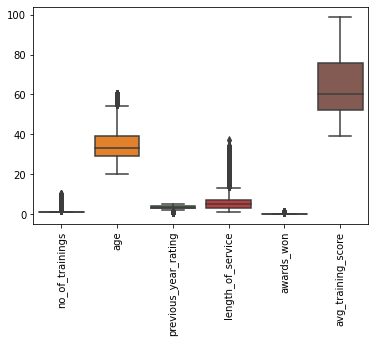

In [73]:
emp_pro_copy=emp_pro.drop(["employee_id","is_promoted"],axis=1)
sns.boxplot(data=emp_pro_copy)
plt.xticks(rotation=90)

In [74]:
#Checking individually for the outliers

Text(0.5, 1.0, 'Box plot of avg_training_score')

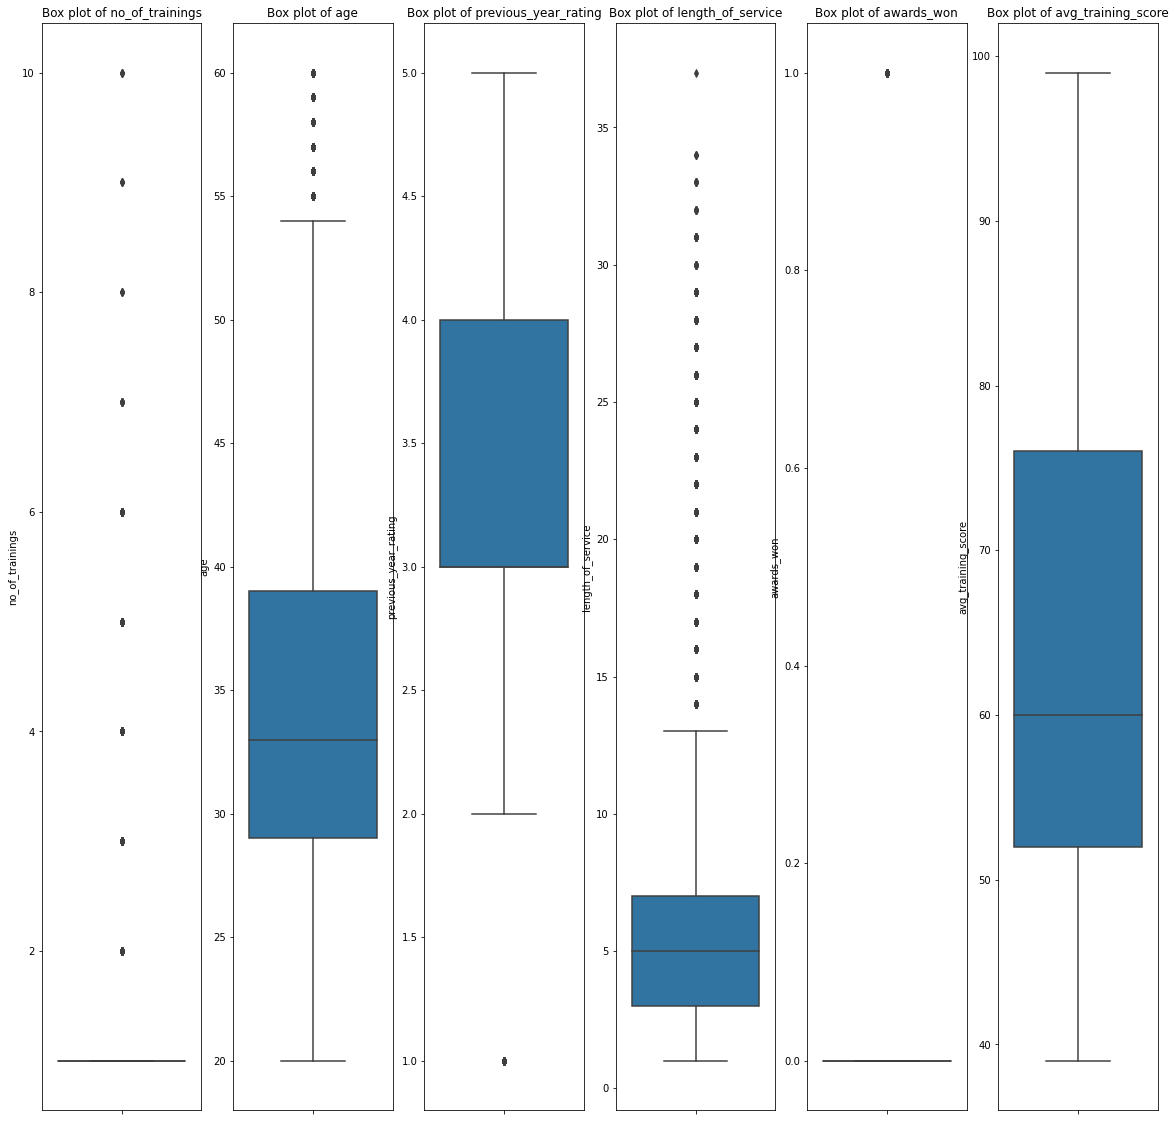

In [75]:
plt.figure(figsize=(20,20))
plt.subplot(1, 6, 1)
sns.boxplot(y="no_of_trainings",data=emp_pro)
plt.title("Box plot of no_of_trainings")
            
plt.subplot(1, 6, 2)
sns.boxplot(y="age",data=emp_pro)
plt.title("Box plot of age")

plt.subplot(1, 6, 3)
sns.boxplot(y="previous_year_rating",data=emp_pro)
plt.title("Box plot of previous_year_rating")

plt.subplot(1, 6, 4)
sns.boxplot(y="length_of_service",data=emp_pro)
plt.title("Box plot of length_of_service")

plt.subplot(1, 6, 5)
sns.boxplot(y="awards_won",data=emp_pro)
plt.title("Box plot of awards_won")

plt.subplot(1, 6, 6)
sns.boxplot(y="avg_training_score",data=emp_pro)
plt.title("Box plot of avg_training_score")

#Here we can see that majorly the outliers are present in the lenght of service column and age column

#We need to handle the outliers. We will handle the outliers for length of service only as there are more outliers 

#Age have outliers but are very few and those are near to the maximum values.The maximum limit is close to 54 and there are 6 outliers which are from 55 to 60 , so it is very close to the limit and hence not handling the outliers for the age as they are very few in number

In [76]:
Q1 = np.percentile(emp_pro["length_of_service"],25,interpolation = 'midpoint')
Q2 = np.percentile(emp_pro["length_of_service"],50,interpolation = 'midpoint')
Q3 = np.percentile(emp_pro["length_of_service"],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  4.0
Lower limit is -3.0
Upper Limit is 13.0


In [77]:
emp_pro["length_of_service"]=np.where(emp_pro["length_of_service"]>upper_limit,upper_limit,np.where(emp_pro["length_of_service"]<lower_limit,lower_limit,emp_pro["length_of_service"]))

Text(0.5, 1.0, 'Box plot of length_of_service')

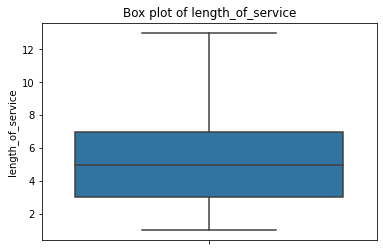

In [78]:
sns.boxplot(y="length_of_service",data=emp_pro)
plt.title("Box plot of length_of_service")

In [79]:
#We can see that the outliers have been handled and have been set to the maximum value 

3.Encoding

In [80]:
emp_pro[emp_pro.select_dtypes(include=['object']).columns.tolist()].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

In [81]:
#Here we can use hot one encoding for the Gender , recruitment channel and gender
#For department and region , we will use label encoding since the values are high

In [82]:
from sklearn.preprocessing import LabelEncoder
Obj_bin=['department','region']
le = LabelEncoder()
emp_pro[Obj_bin]=emp_pro[Obj_bin].apply(le.fit_transform)

In [83]:
emp_pro=pd.get_dummies(emp_pro)

In [84]:
emp_pro.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,7,31,1,35,5.0,8.0,0,49.0,0,0,0,1,1,0,0,0,1
1,65141,4,14,1,30,5.0,4.0,0,60.0,0,1,0,0,0,1,1,0,0
2,7513,7,10,1,34,3.0,7.0,0,50.0,0,1,0,0,0,1,0,0,1
3,2542,7,15,2,39,1.0,10.0,0,50.0,0,1,0,0,0,1,1,0,0
4,48945,8,18,1,45,3.0,2.0,0,73.0,0,1,0,0,0,1,1,0,0


In [85]:
#Now the encoding has been applied in the dataset

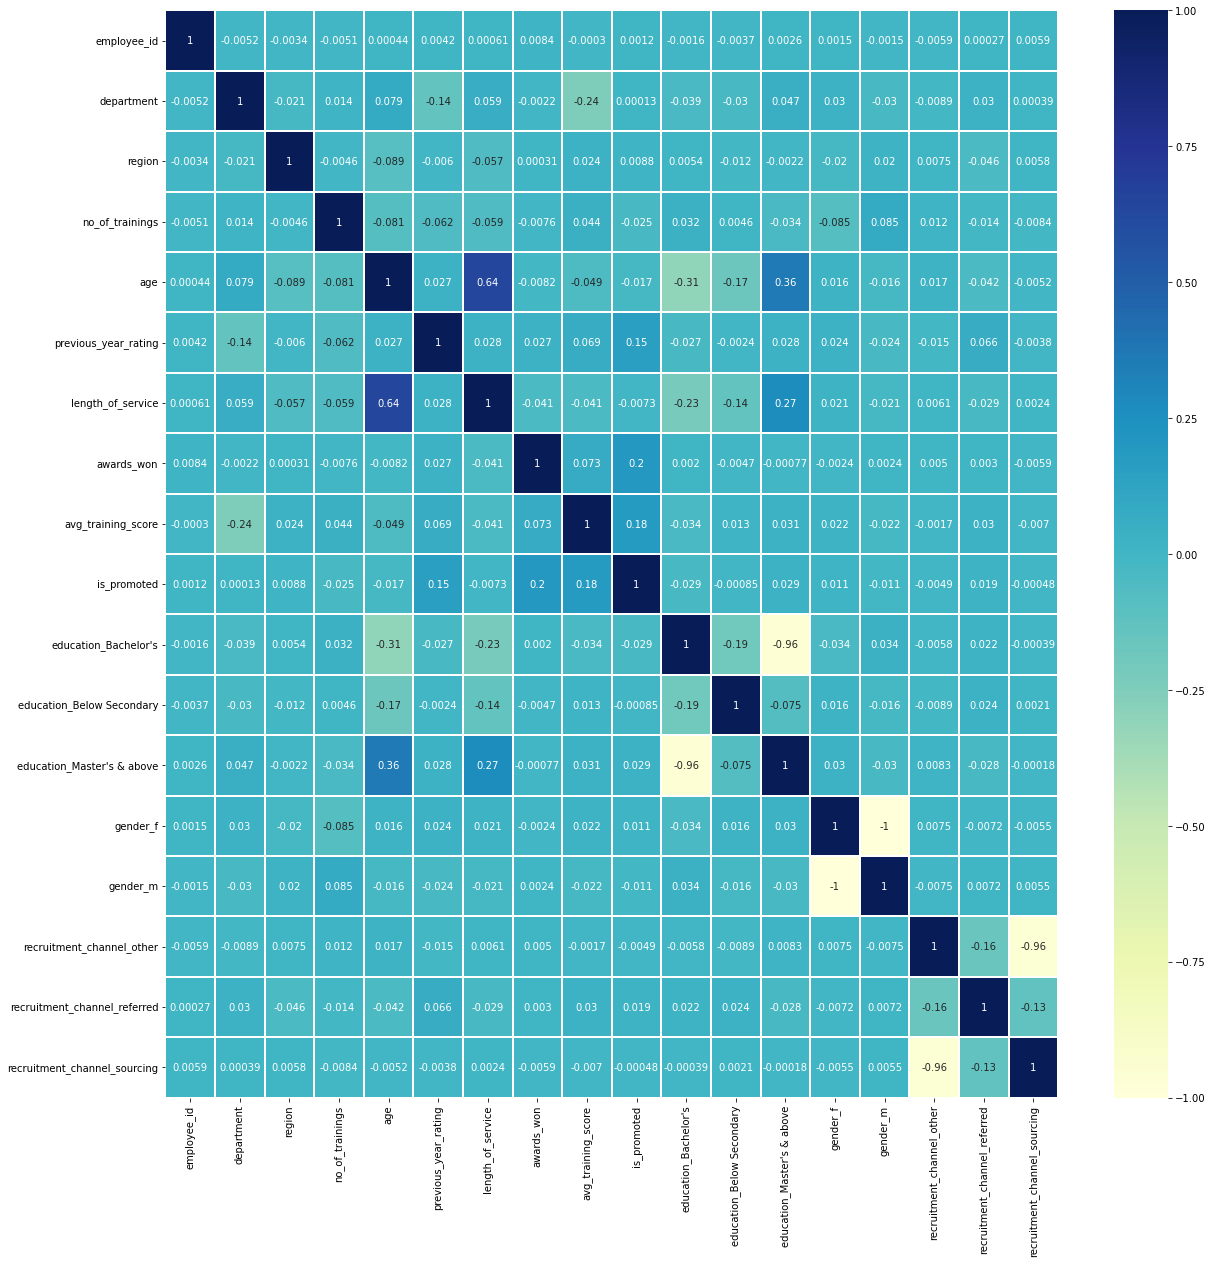

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(emp_pro.corr(),annot=True,linewidths=0.1,cmap="YlGnBu")
plt.show()

4. Feature reduction

In [87]:
#Employee id will not contribute to the target variable and we can remove that from the dataset
#We can also remove the region column as it will not contribute to the promotion variable
#SImilarly recruiment channel is also having very small co relation with the prediction variable , so we can eliminate

In [88]:
emp_pro=emp_pro.drop(["employee_id","region","recruitment_channel_other","recruitment_channel_referred","recruitment_channel_sourcing"],axis=1)

In [89]:
#We have reduced 5 columns in the feature reduction

5. Feature Engineering

In [90]:
emp_pro['performance_metric'] = emp_pro['awards_won']+ emp_pro['previous_year_rating']

emp_pro['total_training_score'] = emp_pro['avg_training_score'] * emp_pro['no_of_trainings']


In [91]:
#Here in feature engineering , we are creating 2 more features performance metric and total training score 
#This confirm 2 consolidated features which might be useful during our prediction

In [92]:
emp_pro.head()

,department,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,performance_metric,total_training_score
0,7,1,35,5.0,8.0,0,49.0,0,0,0,1,1,0,5.0,49.0
1,4,1,30,5.0,4.0,0,60.0,0,1,0,0,0,1,5.0,60.0
2,7,1,34,3.0,7.0,0,50.0,0,1,0,0,0,1,3.0,50.0
3,7,2,39,1.0,10.0,0,50.0,0,1,0,0,0,1,1.0,100.0
4,8,1,45,3.0,2.0,0,73.0,0,1,0,0,0,1,3.0,73.0


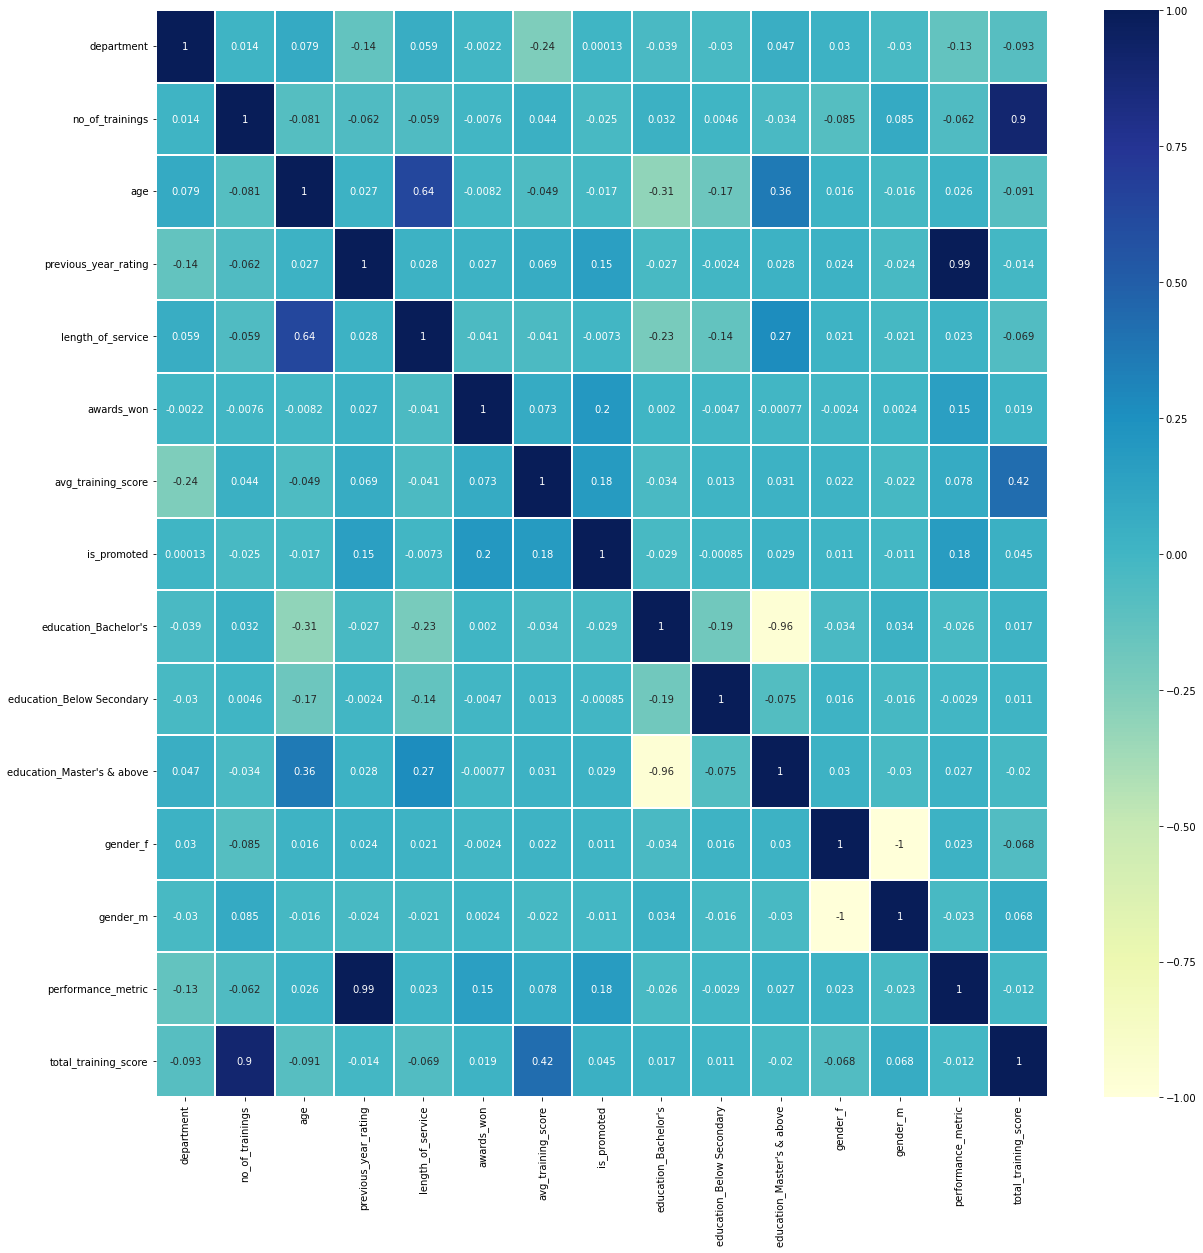

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(emp_pro.corr(),annot=True,linewidths=0.1,cmap="YlGnBu")
plt.show()

In [94]:
#Now we can split the data into 2 parts x and y

In [95]:
X=emp_pro.drop(['is_promoted'],axis=1)
y=emp_pro['is_promoted']

6. Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [97]:
#Scaling the values to put in same scale

# Modelling

In [98]:
#Checking the imbalance of the dataset
y.value_counts(normalize=True).to_frame()

,is_promoted
0,0.91483
1,0.08517


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


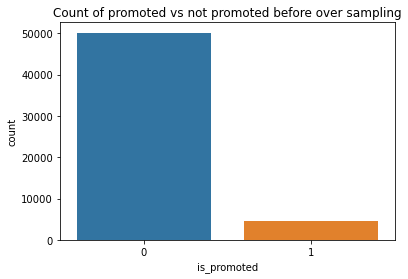

In [99]:
sns.countplot(y)
plt.title("Count of promoted vs not promoted before over sampling")
plt.show()

Here we can see that the data is highly imbalanced. The % promotion is 8.5 % compared to not promoted of 91.5%

So we have to make the dataset balanced

Here we will go for oversampling as in undersampling data drop will be there . 

Oversampling will create new examples in minority class and can keep the data in dataset

In [100]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_os, y_os = smt.fit_resample(X, y)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


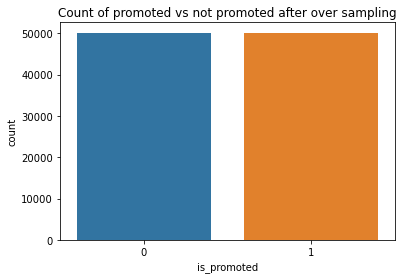

In [101]:
sns.countplot(y_os)
plt.title("Count of promoted vs not promoted after over sampling")
plt.show()

In [102]:
#Checking the imbalance of the dataset
y_os.value_counts(normalize=True).to_frame()
# We can see from the below that the data has become balanced now and now we can proceed for the modelling 

,is_promoted
0,0.5
1,0.5


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state=42,test_size=0.25)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

1. Logistic Regression

In [105]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [247]:
print("Results from logistic regression are as below")
log_result = classification_report(y_predict,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_predict,y_test))

Results from logistic regression are as below


,precision,recall,f1-score,support
0,0.676208,0.677011,0.676609,12632.000000
1,0.671577,0.670767,0.671172,12438.000000
accuracy,0.673913,0.673913,0.673913,0.673913
macro avg,0.673892,0.673889,0.673890,25070.000000
weighted avg,0.673910,0.673913,0.673911,25070.000000


2.SVM

In [107]:
SV=SVC()
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)

In [246]:
print("Results from SVM are as below")
SVM_result = classification_report(y_pred,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred,y_test))

Results from SVM are as below


,precision,recall,f1-score,support
0,0.743971,0.673756,0.707125,13965.000000
1,0.633261,0.708420,0.668735,11105.000000
accuracy,0.689110,0.689110,0.689110,0.689110
macro avg,0.688616,0.691088,0.687930,25070.000000
weighted avg,0.694931,0.689110,0.690120,25070.000000


3.KNN

[0.8994814519345832, 0.8767451136816913, 0.8784204228161149, 0.8706422018348624, 0.8623055444754687, 0.8587554846429996, 0.8504986039090546, 0.8489828480255285, 0.840127642600718, 0.8392102114080574, 0.8302353410450738, 0.8301954527323494, 0.8221380135620263, 0.8229357798165138, 0.8165536497806143, 0.8165536497806143, 0.8094136418029517, 0.8097726366174711, 0.806541683286797]


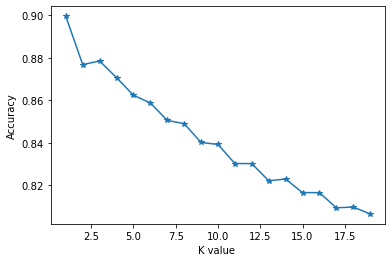

In [109]:
KNN_values=[]
neighbours=np.arange(1,20)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")
plt.show()

In [110]:
KNN=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred1=KNN.predict(X_test)

In [245]:
print("Results from KNN are as below")
KNN_result = classification_report(y_pred1,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred1,y_test))

Results from KNN are as below


,precision,recall,f1-score,support
0,0.880841,0.916646,0.898387,12153.000000
1,0.918458,0.883332,0.900552,12917.000000
accuracy,0.899481,0.899481,0.899481,0.899481
macro avg,0.899650,0.899989,0.899470,25070.000000
weighted avg,0.900223,0.899481,0.899503,25070.000000


4.Decision Tree

In [112]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred2 = DT.predict(X_test)

In [244]:
print("Results from Decision Tree are as below")
DT_result = classification_report(y_pred2,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred2,y_test))

Results from Decision Tree are as below


,precision,recall,f1-score,support
0,0.930814,0.926127,0.928464,12711.000000
1,0.924414,0.929201,0.926802,12359.000000
accuracy,0.927643,0.927643,0.927643,0.927643
macro avg,0.927614,0.927664,0.927633,25070.000000
weighted avg,0.927659,0.927643,0.927645,25070.000000


5.Random Forest

In [114]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train) 
y_pred3 = RF.predict(X_test)

In [243]:
print("Results from Random Forest are as below")
RF_result = classification_report(y_pred3,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred3,y_test))

Results from Random Forest are as below


,precision,recall,f1-score,support
0,0.957144,0.932948,0.944891,12975.000000
1,0.929969,0.955188,0.942410,12095.000000
accuracy,0.943678,0.943678,0.943678,0.943678
macro avg,0.943556,0.944068,0.943650,25070.000000
weighted avg,0.944033,0.943678,0.943694,25070.000000


5. Gradient boosting

In [116]:
GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [242]:
print("Results from Gradient Boosting are as below")
GB_result = classification_report(y_pred4,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred4,y_test))

Results from Gradient Boosting are as below


,precision,recall,f1-score,support
0,0.906697,0.847837,0.876280,13525.000000
1,0.834340,0.897791,0.864903,11545.000000
accuracy,0.870842,0.870842,0.870842,0.870842
macro avg,0.870518,0.872814,0.870592,25070.000000
weighted avg,0.873376,0.870842,0.871041,25070.000000


6. Xtreme Gradient Boosting

In [118]:
xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
y_pred5 = xgb_model.predict(X_test)

In [237]:
print("Results from Xtreme Gradient boosting are as below")
xgb_result = classification_report(y_pred5,y_test,output_dict=True)
xgb_result = pd.DataFrame(xgb_result).transpose()
xgb_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

Results from Xtreme Gradient boosting are as below


,precision,recall,f1-score,support
0,0.995888,0.934833,0.964395,13473.000000
1,0.929325,0.995516,0.961282,11597.000000
accuracy,0.962904,0.962904,0.962904,0.962904
macro avg,0.962606,0.965174,0.962839,25070.000000
weighted avg,0.965097,0.962904,0.962955,25070.000000


In [120]:
xgb_model.score(X_test,y_test)

0.9629038691663343

7. AdaBoost Classifier Model

In [121]:
AD=AdaBoostClassifier()
AD_model= AD.fit(X_train , y_train)
y_pred6=AD_model.predict(X_test)

In [236]:
print("Results from ADA booster are as below")
AD_result = classification_report(y_pred6,y_test,output_dict=True)
AD_result = pd.DataFrame(AD_result).transpose()
AD_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

Results from ADA booster are as below


,precision,recall,f1-score,support
0,0.763580,0.748141,0.755782,12908.000000
1,0.738308,0.754152,0.746146,12162.000000
accuracy,0.751057,0.751057,0.751057,0.751057
macro avg,0.750944,0.751146,0.750964,25070.000000
weighted avg,0.751320,0.751057,0.751107,25070.000000


8. Gaussian Naiver Bayes

In [123]:
GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred7=GNB_model.predict(X_test)

In [235]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred7,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.798292,0.633693,0.706533,15932.000000
1,0.530226,0.720836,0.611011,9138.000000
accuracy,0.665457,0.665457,0.665457,0.665457
macro avg,0.664259,0.677265,0.658772,25070.000000
weighted avg,0.700582,0.665457,0.671715,25070.000000


9. Bagging Classifier

In [134]:
BC=BaggingClassifier()
BC_model=BC.fit(X_train , y_train)
y_pred8=BC_model.predict(X_test)

In [234]:
print("Results from Bagging classifier are as below")
BC_result = classification_report(y_pred8,y_test,output_dict=True)
BC_result = pd.DataFrame(BC_result).transpose()
BC_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred8,y_test))

Results from Bagging classifier are as below


,precision,recall,f1-score,support
0,0.958804,0.927348,0.942814,13076.000000
1,0.923529,0.956562,0.939755,11994.000000
accuracy,0.941324,0.941324,0.941324,0.941324
macro avg,0.941167,0.941955,0.941284,25070.000000
weighted avg,0.941928,0.941324,0.941350,25070.000000


In [127]:
#Combining the F1 score and accuracy results of all the models

In [128]:
dfc =pd.concat([log_result["f1-score"], SVM_result["f1-score"],KNN_result["f1-score"],DT_result["f1-score"],RF_result["f1-score"],GB_result["f1-score"], xgb_result["f1-score"],AD_result["f1-score"], GNB_result["f1-score"],BC_result["f1-score"]],axis=1)
dfc.columns
df2 = dfc.set_axis(["log_result", "SVM_result","KNN_result","DT_result","RF_result","GB_result", "xgb_result","AD_result","GNB_result","BC_result"], axis=1, inplace=False)

In [231]:
df2.loc[["macro avg","accuracy"]].transpose().sort_values(by="macro avg",ascending=False).style.background_gradient(cmap="RdPu")

,macro avg,accuracy
xgb_result,0.962839,0.962904
RF_result,0.943650,0.943678
BC_result,0.942404,0.942441
DT_result,0.927633,0.927643
KNN_result,0.899470,0.899481
GB_result,0.870592,0.870842
AD_result,0.750964,0.751057
SVM_result,0.687930,0.689110
log_result,0.673890,0.673913
GNB_result,0.658772,0.665457


We can see that from the above models , Xtreme Gradient boosting and Random Forest are having the best results 

Followed by the above two , Bagging  and DT are 3rd and 4th

So we will do the hyper parameter tuning in XGB models

# Model Fine tuning

We will use the Random search in these two models

1. XGB model

In [162]:
from pprint import pprint

xgb = XGBClassifier(random_state = 42)

print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


In [150]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 8, 9, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7, 9, 11 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "n_estimators"  : [100,200,300,400,500]
    
}

In [152]:
#Running random search
xgb= XGBClassifier()
xgb_random=RandomizedSearchCV(xgb,param_distributions=params,n_iter=50,scoring='f1',cv=4,verbose=3)
xgb_random.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.964 total time=   7.1s
[CV 2/4] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.961 total time=   7.1s
[CV 3/4] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.964 total time=   7.1s
[CV 4/4] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300;, score=0.960 total time=   7.1s
[CV 1/4] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=200;, score=0.963 total time=  14.0s
[CV 2/4] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=200;, score=0.962 total time=  14.1s
[CV 3/4] END colsample_bytree=0.4, gamma=0.0, le

[CV 4/4] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300;, score=0.930 total time=   6.9s
[CV 1/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.964 total time=  13.9s
[CV 2/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.961 total time=  13.9s
[CV 3/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.964 total time=  13.9s
[CV 4/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.960 total time=  13.9s
[CV 1/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=11, n_estimators=300;, score=0.930 total time=   4.7s
[CV 2/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=11, n_estim

[CV 4/4] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=200;, score=0.960 total time=  12.4s
[CV 1/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=100;, score=0.963 total time=   4.4s
[CV 2/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=100;, score=0.961 total time=   4.4s
[CV 3/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=100;, score=0.963 total time=   4.3s
[CV 4/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=100;, score=0.960 total time=   4.4s
[CV 1/4] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=11, n_estimators=200;, score=0.961 total time=  15.3s
[CV 2/4] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=11, n_e

[CV 3/4] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=11, n_estimators=400;, score=0.963 total time=  28.6s
[CV 4/4] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=11, n_estimators=400;, score=0.961 total time=  28.3s
[CV 1/4] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7, n_estimators=400;, score=0.964 total time=  15.4s
[CV 2/4] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7, n_estimators=400;, score=0.962 total time=  15.4s
[CV 3/4] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7, n_estimators=400;, score=0.964 total time=  15.5s
[CV 4/4] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7, n_estimators=400;, score=0.960 total time=  15.5s
[CV 1/4] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.35, max_depth=8, min_child_weight=5, n_e

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='f1', verbose=3)

In [153]:
xgb_random.best_params_ 

{'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.2,
 'gamma': 0.5,
 'colsample_bytree': 0.5}

In [156]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [193]:
import time 
start=time.time()
Hyper_xgb=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Hyperxgb_model=Hyper_xgb.fit(X_train , y_train)
end=time.time()
xgb_time=end-start
y_predxgb=Hyperxgb_model.predict(X_test)

In [229]:
print("Results from Hyper tuned XGB are as below")
xgbhyper_result = classification_report(y_predxgb,y_test,output_dict=True)
xgbhyper_result = pd.DataFrame(xgbhyper_result).transpose()
xgbhyper_result.style.background_gradient(cmap="PuRd")
#print("Confusion Matrix \n" ,confusion_matrix(y_predxgb,y_test))

Results from Hyper tuned XGB are as below


,precision,recall,f1-score,support
0,0.990749,0.941256,0.965368,13312.000000
1,0.937052,0.990049,0.962822,11758.000000
accuracy,0.964140,0.964140,0.964140,0.964140
macro avg,0.963901,0.965653,0.964095,25070.000000
weighted avg,0.965565,0.964140,0.964174,25070.000000


In [195]:
print("Time taken for the hyper tuned RF model to run is ", xgb_time,"seconds")

Time taken for the hyper tuned RF model to run is  9.736832857131958 seconds


Here we can see that the F1 score has increased from 0.962839 to 0.964095 and also the accuracy has increased from 0.962904 to 0.964140

So hypertuning has increased the F1 score and accuracy

2. Random Forest Model

In [163]:
from pprint import pprint

rf = RandomForestClassifier(random_state = 42)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


#Here Random Forest is coming second in the analysis , but it is less than XGB ,but still checking with parameters to  see any improvement

In [177]:
params_rf={
 "n_estimators"    : [400,500 ] ,
 "max_depth"        : [ 50,60],
    
}

In [178]:
rf = RandomForestClassifier(random_state=1,min_samples_split=15,max_features='sqrt',bootstrap=False)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params_rf, n_iter = 50, cv = 4,scoring='f1',verbose=3, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END ....max_depth=50, n_estimators=400;, score=0.936 total time=  31.7s
[CV 2/4] END ....max_depth=50, n_estimators=400;, score=0.936 total time=  32.7s
[CV 3/4] END ....max_depth=50, n_estimators=400;, score=0.938 total time=  33.4s
[CV 4/4] END ....max_depth=50, n_estimators=400;, score=0.934 total time=  32.3s
[CV 1/4] END ....max_depth=50, n_estimators=500;, score=0.936 total time=  40.2s
[CV 2/4] END ....max_depth=50, n_estimators=500;, score=0.936 total time=  39.9s
[CV 3/4] END ....max_depth=50, n_estimators=500;, score=0.939 total time=  41.6s
[CV 4/4] END ....max_depth=50, n_estimators=500;, score=0.934 total time=  41.1s
[CV 1/4] END ....max_depth=60, n_estimators=400;, score=0.936 total time=  30.3s
[CV 2/4] END ....max_depth=60, n_estimators=400;, score=0.936 total time=  30.7s
[CV 3/4] END ....max_depth=60, n_estimators=400;, score=0.938 total time=  30.3s
[CV 4/4] END ....max_depth=60, n_estimators=400;,

RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    min_samples_split=15,
                                                    random_state=1),
                   n_iter=50,
                   param_distributions={'max_depth': [50, 60],
                                        'n_estimators': [400, 500]},
                   random_state=42, scoring='f1', verbose=3)

In [180]:
rf_random.best_params_

{'n_estimators': 500, 'max_depth': 60}

In [181]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=15,
                       n_estimators=500, random_state=1)

In [196]:
start = time.time()
Hyper_rf=RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=15,
                       n_estimators=500, random_state=1)
Hyper_rfmodel=Hyper_rf.fit(X_train,y_train)
end =time.time()
y_pred_rf=Hyper_rfmodel.predict(X_test)
RF_time=end-start

In [228]:
print("Results from Hyper tuned Random Forest are as below")
RFhyper_result = classification_report(y_pred_rf,y_test,output_dict=True)
RFhyper_result = pd.DataFrame(RFhyper_result).transpose()
RFhyper_result.style.background_gradient(cmap="OrRd")

#print("Confusion Matrix \n" ,confusion_matrix(y_pred_rf,y_test))

Results from Hyper tuned Random Forest are as below


,precision,recall,f1-score,support
0,0.964102,0.931403,0.947471,13091.000000
1,0.927715,0.962100,0.944595,11979.000000
accuracy,0.946071,0.946071,0.946071,0.946071
macro avg,0.945908,0.946752,0.946033,25070.000000
weighted avg,0.946715,0.946071,0.946096,25070.000000


In [198]:
print("Time taken for the hyper tuned RF model to run is ", RF_time,"seconds")

Time taken for the hyper tuned RF model to run is  51.370805740356445 seconds


After hyper tuning of the Random forest model , F1 score improved from 0.943650 to 0.946033 and accuracy from 0.943678 to 0.946071. So there is a improvement based on tuning 

In [213]:
df_res =pd.concat([xgbhyper_result["f1-score"], RFhyper_result["f1-score"]],axis=1)
df_result=df_res.set_axis(["Hypertuned XGB results","Hyper tuned RF results"],axis=1)

In [217]:
df_final=df_result.loc[["macro avg","accuracy"]]
df_final

,Hypertuned XGB results,Hyper tuned RF results
macro avg,0.964095,0.946033
accuracy,0.964140,0.946071


In [226]:
df_final["XGB before Hypertuning"]=[0.962839,0.962904]
df_final["RF before Hypertuning"]=[0.943650,0.943678]
df_final=df_final[list(("XGB before Hypertuning","Hypertuned XGB results","RF before Hypertuning","Hyper tuned RF results"))]
df_final.style.background_gradient(cmap="YlOrRd")

,XGB before Hypertuning,Hypertuned XGB results,RF before Hypertuning,Hyper tuned RF results
macro avg,0.962839,0.964095,0.943650,0.946033
accuracy,0.962904,0.964140,0.943678,0.946071


From the above two even after hyper tuning , F1 score and accuracy of XG Boost model is better than Random Forest and also time taken for the model to run is also less than Random forest , so xgb model is better in terms of output and time , hence proposing the xbg model for promotion prediction

Inferenes from the dataset

1. Sales and marketing and operations comprises of the major employees in the company 

2. Promotion wise technology is highest and legal is the least

3. Region 2 tops the list for employess count wise and promotion wise region 4 tops the least

4. Education wise bachlors degree tops with 70% employees , close to 98% have bachlors or higher degree , only 1.5% are below

5. There is a huge disparity in the gender of employees - with males close to 70% - But the interesting inference is that in promotion point of view ,females are slightly better even with less population

6. Recruitment channel , others top the list and referral is least but promotion wise referred canditates got more

7. 81% have min one training - Training doesnt have much impact as as training increases there is no chance of getting promotion - so there is not much relation

8. Age 26 to 36 constitute the major population of employees. Age is slightly skewed but the outliers were very near to the maximum limit ( 55 -60) so not handled

9. Rating point of view , higher the rating , higher the change of getting promotion

10. Length of service is skwed data with more concentration on 1-10 - outliers were found and was handled as the outlier range was high from 15 to 35 

11. Awards won and average training score have a direct relation with promotion and positive co relation

12. based on the co relation , employee id , region and recruitment channel were removed . Department is also having the less co relation but not removed as the F1 score was getting slightly reduced on its removal

13. Data was highly imbalanced and over sampling technique was applied 

14. Model prediction on imbalanced data produced very less F1 scores in range of 0.70 as to the balanced data where the F1 score are 0.96

15. XG Boost and Random forest performed the best among the models with XGB topping the list 

16. Hyper tuning was performed on these two and again the results were compared . Hyper tuning improved the results in both XG boost and Random forest but XGB came better in terms of F1 score , accuracy and time taken

17. So the final proposal for the employee prediction to the company is XG Boost model